# Exercise 13

## Analyze class homeworks


### Maxwell Calderon Coy . 201920519
### Sergio Ardila Rodríguez 201924139
### Jhon Alex Hernandez 200950288
### Alexander Camargo García 2009325

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel(r'C:\Users\Sergio\Documents\Universidad\Intersemestral\Métodos Avanzados Análisis de Datos\AdvancedMethodsDataAnalysisClass-master\datasets\Consolidado_respuestas_escribir_v2.xlsx')
data = data.fillna('_')
data.head(5)

,Genero,E1 - Examples of Time Series Analysis,E4 - Panel Data,E6 - Decison Trees,E8 - Ensemble Trees Overview,E10 - REST-API,E11 - Natural Language Processing Overview
0,M,One of the most valuable application of time s...,The main difference between panel data and tim...,Decision tree are a model used by the analytic...,They are used to make a better prediction than...,Es una forma de arquitectura de datos. Los mic...,_
1,F,ANÁLISIS DE SERIES DE TIEMPO – USOS \nEl análi...,Series de Tiempo vs Datos en Panel\nUna serie ...,TIPOS DE ÁRBOLES DE DECISIÓN Y APLICACIONES\nL...,ENSAMBLAJE EN MACHINE LEARNING\nLos métodos de...,Microservicios\nEl objetivo principal de la im...,_
2,M,Una serie de tiempo es una colección de datos ...,_,los arboles de decisión hacen parte de los alg...,Ensemble methods is a machine learning techniq...,El enfoque tradicional para el diseño de aplic...,"LexisNexis launched Lexis Analytics, a legal r..."
3,M,\nGiven that Time Series Analysis allows to un...,The difference between panel data and time ser...,Decision Trees Algorithms are machine function...,Ensemble methods in Tree Decision algorithms b...,Micro-services are defined as a type of softwa...,_
4,M,Time Series Analysis is concerned with the stu...,A time series is represented by a variable or ...,Decision trees are a popular supervised machin...,The ensemble method is a combination of severa...,A microservice is a type of information techno...,A commercial product which uses Natural Langua...


In [3]:
data_df = data.copy()
data_df = data_df.drop(["Genero"] , axis=1)

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
from scipy.spatial.distance import cosine
import numpy as np

# Exercise 13.1

Analyze the writing patterns of each student

In [5]:
#!pip install https://github.com/clips/pattern/archive/python3.zip

In [6]:
!pip install googletrans

In [7]:
import googletrans
from googletrans import Translator
translator = Translator()

In [8]:
columns = ['E1 - Examples of Time Series Analysis' , 'E4 - Panel Data' , 'E6 - Decison Trees' , 'E8 - Ensemble Trees Overview' , 'E10 - REST-API' , 'E11 - Natural Language Processing Overview']
columns

['E1 - Examples of Time Series Analysis',
 'E4 - Panel Data',
 'E6 - Decison Trees',
 'E8 - Ensemble Trees Overview',
 'E10 - REST-API',
 'E11 - Natural Language Processing Overview']

In [9]:
data_results = []
data_count = []
data_lang = data_df.iloc[:]
data_lang["English"] = 0
data_lang["Spanish"] = 0
for fila in range(data_df.shape[0]):
    for column in columns:
        if (data_df[column][fila] != '_'):
            langs = translator.detect(data_df[column][fila])
            data_lang[column][fila] = (langs.lang)
        else:
            data_lang[column][fila] = 'No entregada'
            
        if (langs.lang == "en"):
            data_lang["English"][fila] = data_lang["English"][fila] + 1
        if (langs.lang == "es"):
            data_lang["Spanish"][fila] = data_lang["Spanish"][fila] + 1
        langs.lang = "_" 


C:\Users\Sergio\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Sergio\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\Sergio\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Sergio\Anaconda3\lib\site-packages\ipykernel

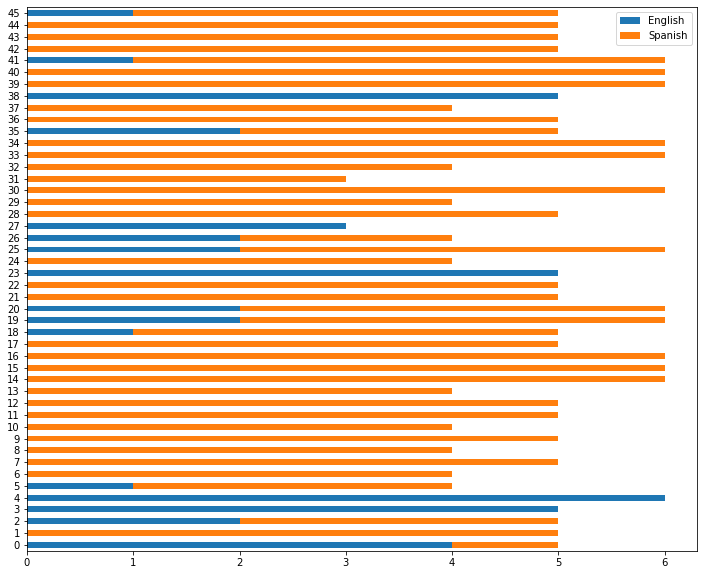

In [10]:
import matplotlib.pyplot as plt
graficar = data_lang[["English", "Spanish"]]
graficar.plot(kind = 'barh' , 
             stacked = 'True',
              figsize=(12,10))

### Se evidencia que la mayoria de estudiantes realizaron las tareas en español mientras solo ciertos estudiantes se caracterizaron por escribir siempre en inglés.

In [11]:
data_lang.head(2)
data.head(2)

,Genero,E1 - Examples of Time Series Analysis,E4 - Panel Data,E6 - Decison Trees,E8 - Ensemble Trees Overview,E10 - REST-API,E11 - Natural Language Processing Overview
0,M,One of the most valuable application of time s...,The main difference between panel data and tim...,Decision tree are a model used by the analytic...,They are used to make a better prediction than...,Es una forma de arquitectura de datos. Los mic...,_
1,F,ANÁLISIS DE SERIES DE TIEMPO – USOS \nEl análi...,Series de Tiempo vs Datos en Panel\nUna serie ...,TIPOS DE ÁRBOLES DE DECISIÓN Y APLICACIONES\nL...,ENSAMBLAJE EN MACHINE LEARNING\nLos métodos de...,Microservicios\nEl objetivo principal de la im...,_


In [12]:
data_df = data.copy()
data_df = data_df.drop(["Genero"] , axis=1)

In [13]:
for fila in range(data_df.shape[0]):
    for column in columns:
        if (data_lang[column][fila] == 'es'):
            langs = translator.translate([data[column][fila]] ,dest='en', src='auto')
            data_df[column][fila] = langs[0].text

In [14]:
data_df["Resumen"] = data_df['E1 - Examples of Time Series Analysis'] + data_df['E4 - Panel Data'] + data_df['E6 - Decison Trees'] + data_df['E8 - Ensemble Trees Overview'] + data_df['E10 - REST-API'] + data_df['E11 - Natural Language Processing Overview'] 

In [15]:
data_results = []
data_count = []

for i in range(data_df.shape[0]):
    dt_words = [ data_df["Resumen"].iloc[i]]
    vect_ = CountVectorizer(stop_words='english',  max_features=5)
    vect_.fit_transform(dt_words)
    vect_count = CountVectorizer()
    X_dtm = vect_count.fit_transform(dt_words)
    total_palabra = X_dtm.shape[1]
    data_count.append(total_palabra)
    data_results.append(vect_.vocabulary_)

### Se revisan las 5 palabras mas usadas por estudiante a lo largo de las tareas entregadas, donde se evidencia que las palabras "trees", "time" y "models" son las mas usadas.

In [16]:
for i in range (len(data_results)):
    print("Estudiante" , i , data_results[i])

Estudiante 0 {'time': 3, 'used': 4, 'data': 0, 'decision': 1, 'node': 2}
Estudiante 1 {'time': 3, 'series': 2, 'trees': 4, 'https': 1, 'com': 0}
Estudiante 2 {'different': 1, 'trees': 4, 'learning': 3, 'decision': 0, 'ensemble': 2}
Estudiante 3 {'data': 0, 'decision': 1, 'trees': 4, 'micro': 2, 'services': 3}
Estudiante 4 {'time': 2, 'data': 0, 'type': 4, 'trees': 3, 'learning': 1}
Estudiante 5 {'time': 4, 'series': 3, 'data': 0, 'models': 2, 'information': 1}
Estudiante 6 {'data': 0, 'models': 3, 'time': 4, 'model': 2, 'different': 1}
Estudiante 7 {'time': 3, 'data': 0, 'different': 1, 'trees': 4, 'methods': 2}
Estudiante 8 {'example': 2, 'number': 3, 'different': 1, 'time': 4, 'data': 0}
Estudiante 9 {'time': 4, 'data': 0, 'decision': 1, 'final': 2, 'model': 3}
Estudiante 10 {'time': 4, 'series': 3, 'applications': 0, 'data': 1, 'microservices': 2}
Estudiante 11 {'time': 2, 'variable': 4, 'example': 0, 'trees': 3, 'models': 1}
Estudiante 12 {'time': 3, 'series': 2, 'use': 4, 'multipl

### La cantidad de palabras diferentes nos muestra la variedad del vocabulario usado por estudiante

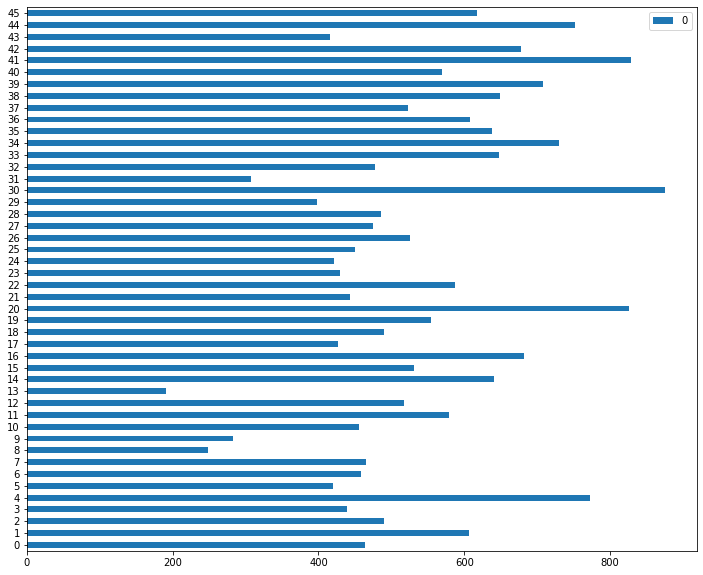

In [17]:
imprimir = pd.DataFrame(data_count)
imprimir.plot(kind = 'barh' , 
             stacked = 'True',
              figsize=(12,10))

# Exercise 13.2

Evaluate the similarities of the homeworks of the students.

At a homework level, then as a student level.


In [18]:
def cosine_distance_countVectorizer(s1, s2):
    vect = CountVectorizer()
    X_dtm = vect.fit_transform([s1, s2]).todense()
    return 1-cosine(X_dtm[0], X_dtm[1])

In [19]:
data.head(5)

,Genero,E1 - Examples of Time Series Analysis,E4 - Panel Data,E6 - Decison Trees,E8 - Ensemble Trees Overview,E10 - REST-API,E11 - Natural Language Processing Overview
0,M,One of the most valuable application of time s...,The main difference between panel data and tim...,Decision tree are a model used by the analytic...,They are used to make a better prediction than...,Es una forma de arquitectura de datos. Los mic...,_
1,F,ANÁLISIS DE SERIES DE TIEMPO – USOS \nEl análi...,Series de Tiempo vs Datos en Panel\nUna serie ...,TIPOS DE ÁRBOLES DE DECISIÓN Y APLICACIONES\nL...,ENSAMBLAJE EN MACHINE LEARNING\nLos métodos de...,Microservicios\nEl objetivo principal de la im...,_
2,M,Una serie de tiempo es una colección de datos ...,_,los arboles de decisión hacen parte de los alg...,Ensemble methods is a machine learning techniq...,El enfoque tradicional para el diseño de aplic...,"LexisNexis launched Lexis Analytics, a legal r..."
3,M,\nGiven that Time Series Analysis allows to un...,The difference between panel data and time ser...,Decision Trees Algorithms are machine function...,Ensemble methods in Tree Decision algorithms b...,Micro-services are defined as a type of softwa...,_
4,M,Time Series Analysis is concerned with the stu...,A time series is represented by a variable or ...,Decision trees are a popular supervised machin...,The ensemble method is a combination of severa...,A microservice is a type of information techno...,A commercial product which uses Natural Langua...


In [20]:
def homeworksimilarities(columna):
    print(columna)
    consolidado = []
    total = 0
    subfila = 0
    total = 0
    for filas in range(data.shape[0]):
        subfila = filas + 1
        while (subfila <= data.shape[0] -1):
            dt_words = data_df[columna].iloc[filas]
            dt_words_sub = data_df[columna].iloc[subfila]
            if (dt_words != dt_words_sub and dt_words != '' and dt_words_sub != ''):
                consolidado.append(cosine_distance_countVectorizer(dt_words ,dt_words_sub))
            else:
                consolidado.append('')
            subfila = subfila + 1
    print('Done!')
    return consolidado

In [21]:
fila = 0
df_homework = pd.DataFrame()
for i in columns:
    df_homework[i] = homeworksimilarities(i)
    fila = fila + 1

E1 - Examples of Time Series Analysis


C:\Users\Sergio\Anaconda3\lib\site-packages\scipy\spatial\distance.py:702: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


Done!
E4 - Panel Data
Done!
E6 - Decison Trees
Done!
E8 - Ensemble Trees Overview
Done!
E10 - REST-API
Done!
E11 - Natural Language Processing Overview
Done!


In [22]:
df_homework.head(5)

,E1 - Examples of Time Series Analysis,E4 - Panel Data,E6 - Decison Trees,E8 - Ensemble Trees Overview,E10 - REST-API,E11 - Natural Language Processing Overview
0,0.809598,0.61024,0.714021,0.737525,0.762874,
1,0.738486,NaN,0.66673,0.685497,0.793968,NaN
2,0.707451,0.737727,0.672018,0.747033,0.677801,
3,0.708018,0.693842,0.75744,0.759549,0.780379,NaN
4,0.479086,0.630196,0.699104,NaN,0.717110,


In [23]:
df_homework["Students"] = ""
conteo = 0
subfila = 0
for filas in range(data.shape[0]):
    subfila = filas + 1
    while (subfila <= data.shape[0] -1):
        df_homework["Students"][conteo] = "Estudiante " + str(filas) + ' Estudiante ' + str(subfila)
        conteo = conteo + 1
        subfila = subfila + 1

C:\Users\Sergio\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [24]:
df_homework.head(100)

,E1 - Examples of Time Series Analysis,E4 - Panel Data,E6 - Decison Trees,E8 - Ensemble Trees Overview,E10 - REST-API,E11 - Natural Language Processing Overview,Students
0,0.809598,0.61024,0.714021,0.737525,0.762874,,Estudiante 0 Estudiante 1
1,0.738486,NaN,0.66673,0.685497,0.793968,NaN,Estudiante 0 Estudiante 2
2,0.707451,0.737727,0.672018,0.747033,0.677801,,Estudiante 0 Estudiante 3
3,0.708018,0.693842,0.75744,0.759549,0.780379,NaN,Estudiante 0 Estudiante 4
4,0.479086,0.630196,0.699104,NaN,0.717110,,Estudiante 0 Estudiante 5
5,NaN,0.716724,0.765401,0.738427,0.771964,,Estudiante 0 Estudiante 6
6,0.66357,0.6938,0.677589,0.65536,0.701814,,Estudiante 0 Estudiante 7
7,0.638242,0.655692,0.535025,NaN,0.586017,,Estudiante 0 Estudiante 8
8,0.341465,0.572492,0.784906,0.688951,0.574010,,Estudiante 0 Estudiante 9
9,0.734236,0.699961,0.762654,NaN,0.819084,,Estudiante 0 Estudiante 10


In [25]:
df_homework.shape

(1035, 7)

In [26]:
for column in columns:
    print('La similud para la tarea ' , column , 'es' , df_homework[column].isna().mean())

La similud para la tarea  E1 - Examples of Time Series Analysis es 0.08502415458937199
La similud para la tarea  E4 - Panel Data es 0.08502415458937199
La similud para la tarea  E6 - Decison Trees es 0.16231884057971013
La similud para la tarea  E8 - Ensemble Trees Overview es 0.293719806763285
La similud para la tarea  E10 - REST-API es 0.043478260869565216
La similud para la tarea  E11 - Natural Language Processing Overview es 0.463768115942029


### Se evidencia similitud de texto marcándose sobretodo este comportamiento de manera general para la tarea E11 - Natural Language Processing Overview

In [27]:
similitud = 0.85
for column in columns:
    for fila in range(df_homework.shape[0]):
        if (df_homework[column][fila] != 'NaN' and df_homework[column][fila] != ''):
            if (float(df_homework[column][fila]) > similitud):
                print(column , df_homework['Students'][fila] , 'similitud' , df_homework[column][fila] )
                


E1 - Examples of Time Series Analysis Estudiante 1 Estudiante 12 similitud 0.8521891296072596
E1 - Examples of Time Series Analysis Estudiante 1 Estudiante 16 similitud 0.8766344296096308
E1 - Examples of Time Series Analysis Estudiante 1 Estudiante 33 similitud 0.8628041720764875
E1 - Examples of Time Series Analysis Estudiante 10 Estudiante 16 similitud 0.8658407303852973
E1 - Examples of Time Series Analysis Estudiante 11 Estudiante 12 similitud 0.8597307898714565
E1 - Examples of Time Series Analysis Estudiante 11 Estudiante 16 similitud 0.8789829000280682
E1 - Examples of Time Series Analysis Estudiante 12 Estudiante 16 similitud 0.8645131202330638
E1 - Examples of Time Series Analysis Estudiante 16 Estudiante 25 similitud 0.8561175606266261
E1 - Examples of Time Series Analysis Estudiante 16 Estudiante 33 similitud 0.8602071093331778
E1 - Examples of Time Series Analysis Estudiante 16 Estudiante 39 similitud 0.8522800686667531
E1 - Examples of Time Series Analysis Estudiante 28 E

### Las anteriores son las tareas con una similitud mayor a 8.5

In [28]:
df_homework.loc[50:100]

,E1 - Examples of Time Series Analysis,E4 - Panel Data,E6 - Decison Trees,E8 - Ensemble Trees Overview,E10 - REST-API,E11 - Natural Language Processing Overview,Students
50,0.734852,0.672532,0.716318,0.76173,0.709980,,Estudiante 1 Estudiante 7
51,0.766742,0.793117,0.478783,NaN,0.646022,,Estudiante 1 Estudiante 8
52,0.308263,0.561989,0.734436,0.795349,0.593176,,Estudiante 1 Estudiante 9
53,0.832873,0.71859,0.734646,NaN,0.744196,,Estudiante 1 Estudiante 10
54,0.835666,0.821699,0.778297,0.827526,0.734515,,Estudiante 1 Estudiante 11
55,0.852189,0.70934,0.736442,0.709793,0.711331,,Estudiante 1 Estudiante 12
56,0.810915,0.588464,NaN,0.638117,0.686383,,Estudiante 1 Estudiante 13
57,0.816571,0.79794,0.744939,0.840393,0.745795,NaN,Estudiante 1 Estudiante 14
58,0.697204,0.56873,0.727436,0.857081,0.750583,NaN,Estudiante 1 Estudiante 15
59,0.876634,0.700564,0.816542,0.841375,0.790528,NaN,Estudiante 1 Estudiante 16


# Exercise 13.3

Create a classifier to predict the gender of each student



In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [31]:
data = pd.read_excel(r'C:\Users\Sergio\Documents\Universidad\Intersemestral\Métodos Avanzados Análisis de Datos\AdvancedMethodsDataAnalysisClass-master\datasets\Consolidado_respuestas_escribir_v2.xlsx')
data = data.fillna('_')

In [32]:
y = data["Genero"]
X = data_df['Resumen']

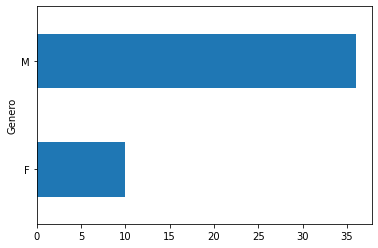

In [33]:
y.groupby(y).count().plot(kind = 'barh')

### Se evidencia un desbalanceo entre el genero de los estudiantes

In [34]:
# create a document-term matrix using TF-IDF
vect = CountVectorizer()
dtm = vect.fit_transform(X)
features = vect.get_feature_names()
dtm

<46x6738 sparse matrix of type '<class 'numpy.int64'>'
	with 24784 stored elements in Compressed Sparse Row format>

In [35]:
X_train, X_test, y_train, y_test = train_test_split(dtm, y, random_state=1 , test_size=0.8)

In [36]:
clf = RandomForestClassifier(random_state=1, n_jobs=-1)
accuracy = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy').mean()

C:\Users\Sergio\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Sergio\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Sergio\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Sergio\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Sergio\Anaconda3

In [37]:
accuracy

0.8666666666666666

In [38]:
clf.fit(X_train, y_train)
y_pred_clf = clf.predict(X_test)
print('El accuracy para la base de datos de train: ', metrics.accuracy_score(y_pred_clf, y_test))

C:\Users\Sergio\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


El accuracy para la base de datos de train:  0.8108108108108109


In [39]:
# create a document-term matrix using TF-IDF
vect = CountVectorizer(stop_words='english' , ngram_range=(1, 10))
dtm = vect.fit_transform(X)
features = vect.get_feature_names()
X_train, X_test, y_train, y_test = train_test_split(dtm, y, random_state=1 , test_size=0.8)

In [40]:
clf2 = RandomForestClassifier(random_state=1, n_jobs=-1)
accuracy = cross_val_score(clf2, X_train, y_train, cv=5, scoring='accuracy').mean()

C:\Users\Sergio\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Sergio\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Sergio\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Sergio\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Sergio\Anaconda3

In [41]:
accuracy

0.8666666666666666

In [42]:
clf2.fit(X_train, y_train)
y_pred_clf = clf2.predict(X_test)
print('El accuracy para la base de datos de test: ', metrics.accuracy_score(y_pred_clf, y_test))
print(classification_report(y_test, y_pred_clf))

C:\Users\Sergio\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


El accuracy para la base de datos de test:  0.7837837837837838
              precision    recall  f1-score   support

           F       0.00      0.00      0.00         8
           M       0.78      1.00      0.88        29

    accuracy                           0.78        37
   macro avg       0.39      0.50      0.44        37
weighted avg       0.61      0.78      0.69        37



C:\Users\Sergio\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Exercise 13.4
Classify group members into different subgroups (minimum 3) according to a characteristic of your choice.

In [43]:
imprimir.describe()

,0
count,46.000000
mean,538.782609
std,151.181556
min,191.000000
25%,444.750000
50%,520.000000
75%,640.250000
max,875.000000


In [50]:
m25_  = 444
m50_ = 520
m75_= 640
imprimir["Grupo"] = 1
imprimir.columns = ["Palabras" ,"Grupo"]
imprimir.loc[imprimir['Palabras'] > m25_, 'Grupo'] = 2
imprimir.loc[imprimir['Palabras'] > m50_, 'Grupo'] = 3
imprimir.loc[imprimir['Palabras'] > m75_, 'Grupo'] = 4



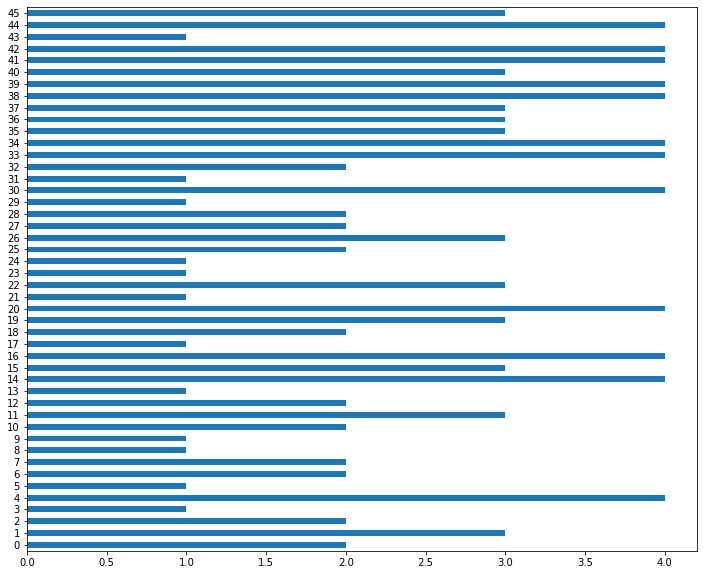

In [51]:
imprimir["Grupo"].plot(kind = 'barh' , 
                stacked = 'True',
                figsize=(12,10))

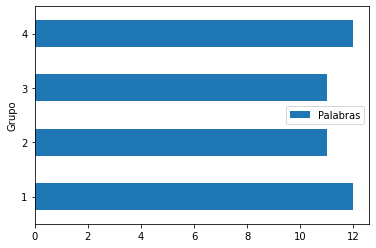

In [53]:
imprimir.groupby(["Grupo"]).count().plot(kind = 'barh')

### Se clasifican por subgrupo de acuerdo a la característica de cantidad de palabras en total en las tareas. 

### Se crea subgrupo por idioma

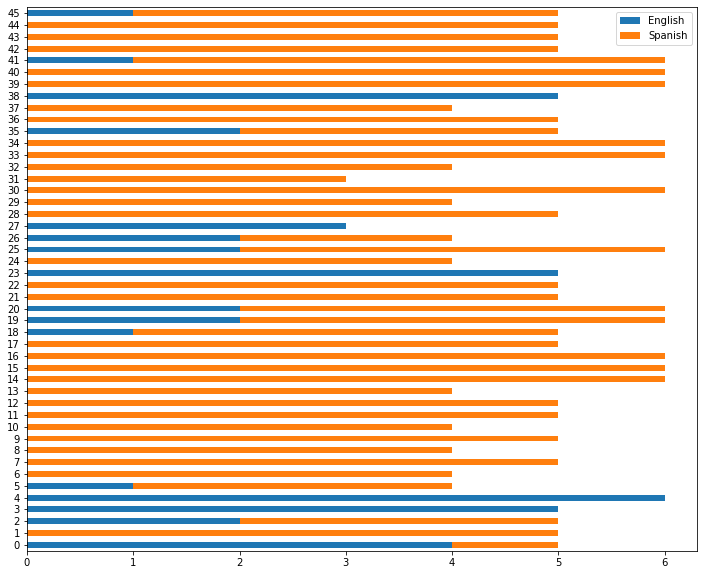

In [54]:
import matplotlib.pyplot as plt
graficar = data_lang[["English", "Spanish"]]
graficar.plot(kind = 'barh' , 
             stacked = 'True',
              figsize=(12,10))